<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


___________________________________

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc


In [2]:
df = pd.read_pickle("../datos/df_nonulls_encoded_sinout_estand.pkl")
df["is_fraudulent"] = df["is_fraudulent"].astype("int")
df

,customer_id,merchant_id,location,purchase_category,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,amount_minmax,customer_age_minmax,is_fraudulent
0,0.540537,0.517856,0.497382,0.524610,0.0,0.0,1.0,0.0,0.575423,0.480769,0
1,0.543680,0.536825,0.529126,0.486978,0.0,0.0,0.0,1.0,0.189301,0.826923,1
2,0.586109,0.506026,0.600000,0.524610,0.0,0.0,1.0,0.0,0.123960,0.750000,1
3,0.543680,0.525765,0.600000,0.505313,0.0,1.0,0.0,0.0,0.761671,0.788462,1
4,0.470012,0.523806,0.497382,0.513546,0.0,0.0,1.0,0.0,0.188153,0.346154,1
...,...,...,...,...,...,...,...,...,...,...,...
9724,0.534061,0.548068,0.497608,0.479829,0.0,0.0,1.0,0.0,0.893437,0.346154,1
9725,0.504951,0.523362,0.481651,0.513546,0.0,0.0,1.0,0.0,0.001956,0.461538,0
9726,0.514017,0.451935,0.574468,0.486978,1.0,0.0,0.0,0.0,0.632990,0.346154,0
9727,0.484857,0.435902,0.537688,0.513546,0.0,0.0,0.0,1.0,0.282959,0.750000,1


In [3]:
vr="is_fraudulent"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

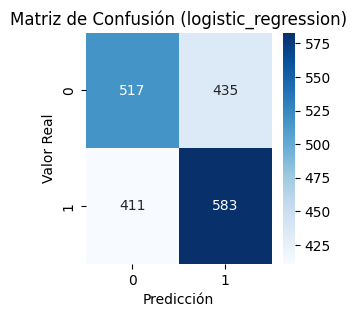

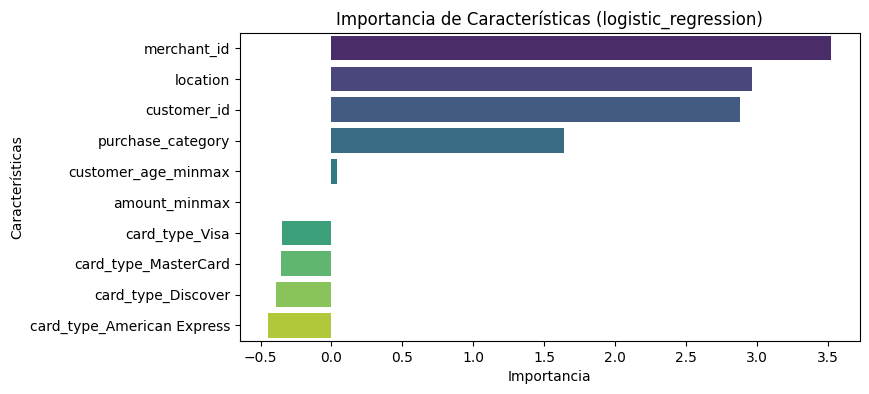

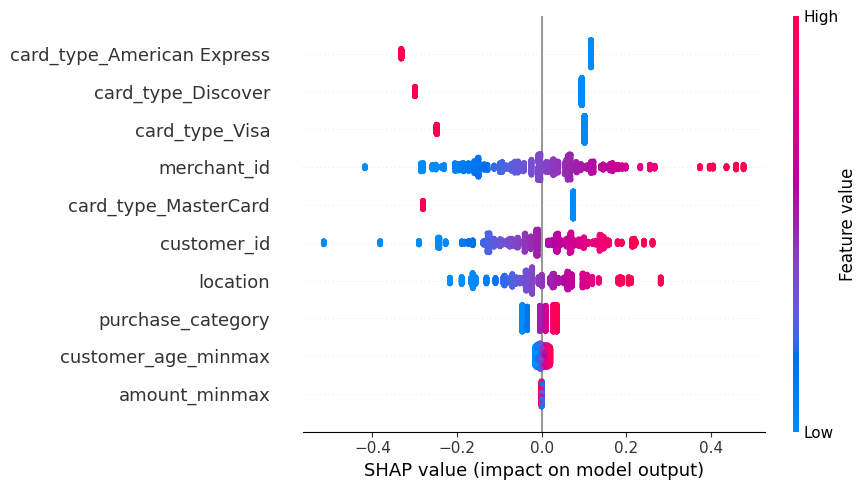

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.559296,0.559193,0.559296,0.558882,0.117963,0.587069,0.002003,NaN,NaN,NaN,regresion logistica
test,0.565262,0.565070,0.565262,0.565080,0.129655,0.579012,NaN,NaN,0.002003,NaN,regresion logistica


In [22]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

modelo_clasificacion.plot_matriz_confusion("logistic_regression")
modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=3)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.550302,0.571956,0.550302,0.506776,0.094461,0.577210,0.001997,16.0,NaN,NaN
test,0.532888,0.540280,0.532888,0.488459,0.053770,0.528082,NaN,NaN,0.001997,16.0


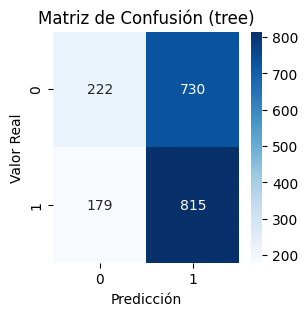

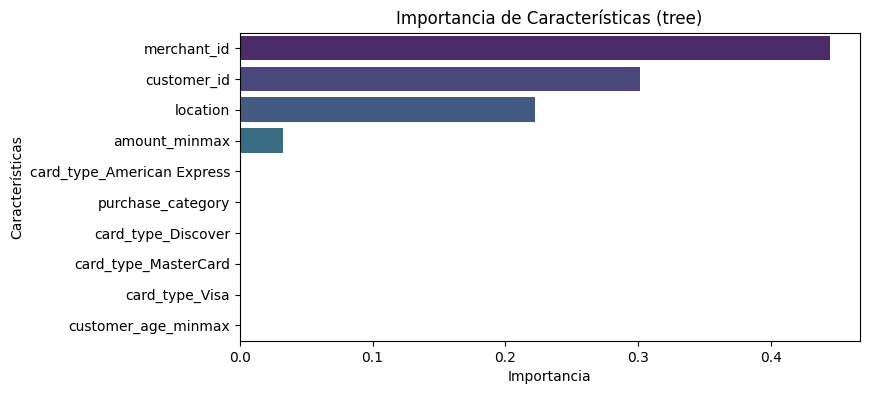

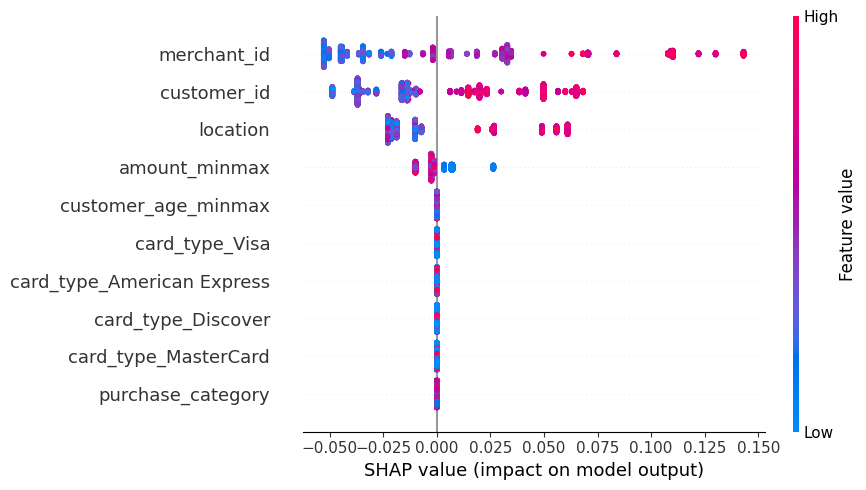

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.550302,0.571956,0.550302,0.506776,0.094461,0.577210,0.001997,16.0,NaN,NaN,decision tree
test,0.532888,0.540280,0.532888,0.488459,0.053770,0.528082,NaN,NaN,0.001997,16.0,decision tree
train,0.559296,0.559193,0.559296,0.558882,0.117963,0.587069,0.002003,NaN,NaN,NaN,regresion logistica
test,0.565262,0.565070,0.565262,0.565080,0.129655,0.579012,NaN,NaN,0.002003,NaN,regresion logistica


In [23]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


modelo_clasificacion.plot_matriz_confusion("tree")
modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

### **Random Forest**

In [16]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)

df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es RandomForestClassifier(max_depth=6, min_samples_leaf=2)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.629577,0.629920,0.629577,0.628972,0.258463,0.684704,0.053999,NaN,NaN,NaN
test,0.558068,0.557685,0.558068,0.557233,0.114427,0.570358,NaN,NaN,0.053999,NaN


### **Gradient Boosting**

In [26]:
modelo_clasificacion.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")
display(df_resultados_gradient_boosting)

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=4,
                           subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.592959,0.594164,0.592959,0.590614,0.184503,0.634451,0.027999,16.0,NaN,NaN
test,0.550360,0.549928,0.550360,0.547933,0.097838,0.566835,NaN,NaN,0.027999,16.0


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.592959,0.594164,0.592959,0.590614,0.184503,0.634451,0.027999,16.0,NaN,NaN,gradient boosting
test,0.550360,0.549928,0.550360,0.547933,0.097838,0.566835,NaN,NaN,0.027999,16.0,gradient boosting
train,0.629577,0.629920,0.629577,0.628972,0.258463,0.684704,0.053999,NaN,NaN,NaN,random forest
test,0.558068,0.557685,0.558068,0.557233,0.114427,0.570358,NaN,NaN,0.053999,NaN,random forest
train,0.550302,0.571956,0.550302,0.506776,0.094461,0.577210,0.001997,16.0,NaN,NaN,decision tree
test,0.532888,0.540280,0.532888,0.488459,0.053770,0.528082,NaN,NaN,0.001997,16.0,decision tree
train,0.559296,0.559193,0.559296,0.558882,0.117963,0.587069,0.002003,NaN,NaN,NaN,regresion logistica
test,0.565262,0.565070,0.565262,0.565080,0.129655,0.579012,NaN,NaN,0.002003,NaN,regresion logistica


### **XGBoost**

In [27]:
modelo_clasificacion.ajustar_modelo("xgboost")
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_xgboost, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.601824,0.602402,0.601824,0.600586,0.202629,0.644366,0.023608,NaN,NaN,NaN
test,0.552929,0.552515,0.552929,0.552085,0.104129,0.564588,NaN,NaN,0.023608,NaN


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.601824,0.602402,0.601824,0.600586,0.202629,0.644366,0.023608,NaN,NaN,NaN,xgboost
test,0.552929,0.552515,0.552929,0.552085,0.104129,0.564588,NaN,NaN,0.023608,NaN,xgboost
train,0.592959,0.594164,0.592959,0.590614,0.184503,0.634451,0.027999,16.0,NaN,NaN,gradient boosting
test,0.550360,0.549928,0.550360,0.547933,0.097838,0.566835,NaN,NaN,0.027999,16.0,gradient boosting
train,0.629577,0.629920,0.629577,0.628972,0.258463,0.684704,0.053999,NaN,NaN,NaN,random forest
test,0.558068,0.557685,0.558068,0.557233,0.114427,0.570358,NaN,NaN,0.053999,NaN,random forest
train,0.550302,0.571956,0.550302,0.506776,0.094461,0.577210,0.001997,16.0,NaN,NaN,decision tree
test,0.532888,0.540280,0.532888,0.488459,0.053770,0.528082,NaN,NaN,0.001997,16.0,decision tree
train,0.559296,0.559193,0.559296,0.558882,0.117963,0.587069,0.002003,NaN,NaN,NaN,regresion logistica
test,0.565262,0.565070,0.565262,0.565080,0.129655,0.579012,NaN,NaN,0.002003,NaN,regresion logistica


Una vez hemos agrupado todas las métricas en un mismo df vamos a ponerlas distintos colores para verlas mejor y analizarlas.

In [31]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(fpc.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.601824,0.602402,0.601824,0.600586,0.202629,0.644366,0.023608,nan,nan,nan,xgboost
1,0.552929,0.552515,0.552929,0.552085,0.104129,0.564588,nan,nan,0.023608,nan,xgboost
2,0.592959,0.594164,0.592959,0.590614,0.184503,0.634451,0.027999,16.000000,nan,nan,gradient boosting
3,0.550360,0.549928,0.550360,0.547933,0.097838,0.566835,nan,nan,0.027999,16.000000,gradient boosting
4,0.629577,0.629920,0.629577,0.628972,0.258463,0.684704,0.053999,nan,nan,nan,random forest
5,0.558068,0.557685,0.558068,0.557233,0.114427,0.570358,nan,nan,0.053999,nan,random forest
6,0.550302,0.571956,0.550302,0.506776,0.094461,0.577210,0.001997,16.000000,nan,nan,decision tree
7,0.532888,0.540280,0.532888,0.488459,0.053770,0.528082,nan,nan,0.001997,16.000000,decision tree
8,0.559296,0.559193,0.559296,0.558882,0.117963,0.587069,0.002003,nan,nan,nan,regresion logistica
9,0.565262,0.565070,0.565262,0.565080,0.129655,0.579012,nan,nan,0.002003,nan,regresion logistica


La mejor métrica que obtenemos es para regresión logística, sin embargo, no podemos ajustar los parámetros para este modelo por lo que nos fijaremos en los demás valores y veremos cual podemos mejorar. El resto de las métricas en general son todas bastante parecidas, sin embargo, xgboost y random forest ofrecen unas métricas un poco mejores al resto, siendo incluso un poco mejor random forest. 

Tanto para xgboost como para random forest tenemos un 0.55 en accuracy para el test que es realmente en la métrica que más tenemos que fijarnos ya que es más a como se va a asemejar cuando intente predecir nuevos datos. Además, nos interesa tener un recall más alto y una precisión más baja ya que lo que queremos hacer es minimizar los falsos negativos. El recall del test es 0.558 y el del random forest 0.552 cuya diferencia es muy muy baja. En cuanto al kappa, de nuevo tenemos valores muy similares. Aunque sea ligeramente mejor el random forest computacionalmente lleva mucho más tiempo (9 min) que el xgboost(2 min), por lo que nos merece más la pena intentar ajustar los parámetros del xgboot aunque sean ligeramente inferiores.

### **Reajustamos parámetros**

In [5]:
params = {'n_estimators': [100, 150, 200, 250],
            'learning_rate': [0.05, 0.1],
            'max_depth': [2, 3, 4, 5, 6],
            'min_child_weight': [1, 2, 3, 4, 5],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
            }

modelo_clasificacion.ajustar_modelo("xgboost", param_grid=params)
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")
df_resultados_xgboost


Param_grid:
{'n_estimators': [100, 150, 200, 250], 'learning_rate': [0.05, 0.1], 'max_depth': [2, 3, 4, 5, 6], 'min_child_weight': [1, 2, 3, 4, 5], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]}
<class 'dict'>
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.600668,0.600911,0.600668,0.599906,0.200532,0.638611,0.006004,NaN,NaN,NaN
test,0.558068,0.557693,0.558068,0.557313,0.114505,0.564151,NaN,NaN,0.006004,NaN


Ajustando los parámetros hemos obtenido una ligerísima mejora pero no es posible mejorarlo aún más. 

Llegados a este punto el planteamiento para obtener mejores métricas sería volver a generar todas estos modelos pero con el df sin estandarizar y ver qué obtenemos.